# Import modules

In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# A. Perfusion bioreactor (chemostat with cell retention)

## Define functions & parameters

In [39]:
# parameter values
mumax = 0.8      # 1/hour
Ks = 0.01         # g/liter
Yxs = 0.5         # g/g
Ypx = 0.1         # g/g
Sf = 10.0         # g/liter
ms = 0.05 # g/gh
beta = 0.2 # bleed rate
gamma = 0.9 # cell retention efficiency

# inlet flowrate
def F(t):
    return 2

# outlet flowrate
## bleed flowrate
def Fbleed(t): 
    return beta*F(t)

## spent media flowrate
def Fspent(t):
    return (1-beta)*F(t)

# reaction rates
## specific cell growth rate
def mu(S):
    return mumax*S/(Ks + S)

## cell growth rate
def Rg(X,S):
    return mu(S)*X

## product formation rate
def Rp(X,S):
    return Ypx*Rg(X,S)

## substrate consumption rate 
## (assume contribution of cell maintenance & growth dominates over product formation)
def Rs(X,S): 
    return ms*X + Rg(X,S)/Yxs  

# differential equations
def xdot(x,t):
    X,P,S,V = x
    dX = -Fbleed(t)*X/V - Fspent(t)*(1-gamma)*X/V + Rg(X,S)
    dP = -F(t)*P/V + Rp(X,S)
    dS = F(t)*(Sf-S)/V - Rs(X,S)
    dV = F(t) - Fbleed(t) - Fspent(t)
    return [dX,dP,dS,dV]



## Simulation

Final Substrate Concentration: 0.0233
Final Cell Concentration: 17.0541


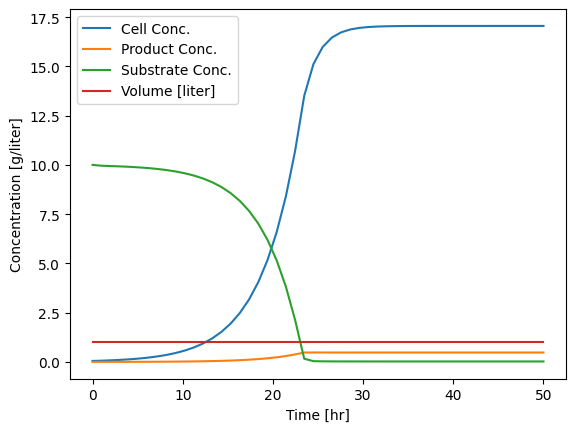

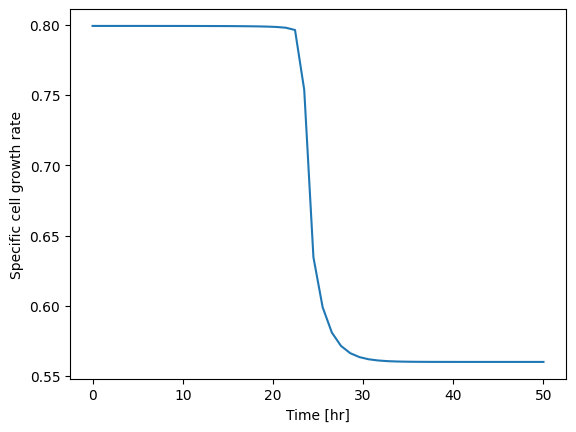

In [42]:
IC = [0.05, 0.0, 10.0, 1.0]

t = np.linspace(0,50)
sol = odeint(xdot,IC,t)
X,P,S,V = sol.transpose()
mu_array = mu(S)

print('Final Substrate Concentration:', round(S[-1],4))
print('Final Cell Concentration:', round(X[-1],4))

plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Product Conc.',
            'Substrate Conc.',
            'Volume [liter]'])
plt.show()

plt.plot(t, mu_array)
plt.xlabel('Time [hr]')
plt.ylabel('Specific cell growth rate')
plt.show()


# B. Chemostat with no cell retention (standard)

## Define functions & parameters

In [44]:
# parameter values
mumax = 2      # 1/hour
Ks = 0.01         # g/liter
Yxs = 0.5         # g/g
Ypx = 0.1         # g/g
Sf = 10.0         # g/liter
ms = 0.05 # g/gh
beta = 1 # bleed rate
gamma = 0 # cell retention efficiency

# inlet flowrate
def F(t):
    return 1.2

# outlet flowrate
## bleed flowrate
def Fbleed(t): 
    return beta*F(t)

## spent media flowrate
def Fspent(t):
    return (1-beta)*F(t)

# reaction rates
## specific cell growth rate
def mu(S):
    return mumax*S/(Ks + S)

## cell growth rate
def Rg(X,S):
    return mu(S)*X

## product formation rate
def Rp(X,S):
    return Ypx*Rg(X,S)

## substrate consumption rate 
## (assume contribution of cell maintenance & growth dominates over product formation)
def Rs(X,S): 
    return ms*X + Rg(X,S)/Yxs  

# differential equations
def xdot(x,t):
    X,P,S,V = x
    dX = -Fbleed(t)*X/V - Fspent(t)*(1-gamma)*X/V + Rg(X,S)
    dP = -F(t)*P/V + Rp(X,S)
    dS = F(t)*(Sf-S)/V - Rs(X,S)
    dV = F(t) - Fbleed(t) - Fspent(t)
    return [dX,dP,dS,dV]



## Simulation

Calculated Steady state Substrate Concentration: 0.015
Simulated Final Substrate Concentration: 0.015
Calculated Steady state Cell Concentration: 4.898
Simulated Final Cell Concentration: 4.8906


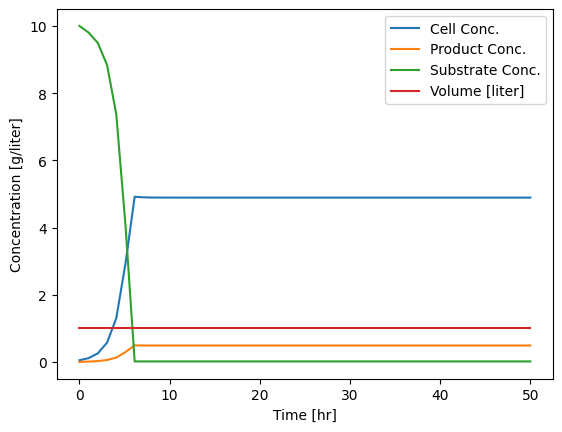

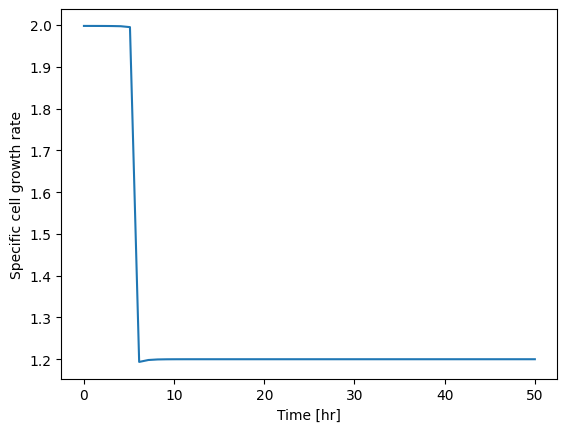

In [48]:
X0 = 0.05
P0 = 0
S0 = 10
V0 = 1.0
IC = [X0, P0, S0, V0]

t = np.linspace(0,50)
sol = odeint(xdot,IC,t)
X,P,S,V = sol.transpose()
mu_array = mu(S)

# calculate steady state values
Sss = F(0)/V0 * Ks / (mumax - F(0)/V0)
print('Calculated Steady state Substrate Concentration:', round(Sss,4))
print('Simulated Final Substrate Concentration:', round(S[-1],4))
Xss = Sf/(ms/(F(0)/V0) + 1/Yxs)
print('Calculated Steady state Cell Concentration:', round(Xss,4))
print('Simulated Final Cell Concentration:', round(X[-1],4))

plt.plot(t,X)
plt.plot(t,P)
plt.plot(t,S)
plt.plot(t,V)

plt.xlabel('Time [hr]')
plt.ylabel('Concentration [g/liter]')
plt.legend(['Cell Conc.',
            'Product Conc.',
            'Substrate Conc.',
            'Volume [liter]'])
plt.show()

plt.plot(t, mu_array)
plt.xlabel('Time [hr]')
plt.ylabel('Specific cell growth rate')
plt.show()

